In [1]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the data
file_path = 'to code - Copy - 2.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows of the data
print("Original Data:")
print(data.head())


Original Data:
   P_SEXE  P_GRAGE  D_ORIXCOOR  D_ORIYCOOR  D_DESTXCOOR  D_DESTYCOOR  D_HREDE
0       1       14      291500     5045500       291500      5045500      930
1       1       14      291500     5045500       291500      5045500     1030
2       1       14      291500     5045500       292500      5045500     1200
3       1       14      292500     5045500       291500      5045500     1300
4       1       14      291500     5045500       291500      5045500     1400


In [2]:
# Cell 2: Normalize Data and Prepare Sequences
scalers = {}
scaled_data = data.copy()

# Normalize numeric columns
for col in scaled_data.columns:
    if pd.api.types.is_numeric_dtype(scaled_data[col]):
        scaler = MinMaxScaler()
        scaled_data[col] = scaler.fit_transform(scaled_data[[col]])
        scalers[col] = scaler

# Convert to NumPy array
scaled_array = scaled_data.values

# Create sequences for autoregression
def create_sequences(data, sequence_length=10):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

sequence_length = 10  # Number of timesteps for prediction
X, y = create_sequences(scaled_array, sequence_length)

print(f"Shape of X (input sequences): {X.shape}")
print(f"Shape of y (targets): {y.shape}")


Shape of X (input sequences): (12165, 10, 7)
Shape of y (targets): (12165, 7)


In [3]:
# Cell 3: Define the LSTM Model
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(sequence_length, scaled_array.shape[1])),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(scaled_array.shape[1])  # Output layer matches the number of features
])

model.compile(optimizer='adam', loss='mse')
model.summary()


C:\Users\TanMeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 128)             │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,495 (466.78 KB)

 Trainable params: 119,495 (466.78 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Cell 4: Train the Model
history = model.fit(
    X, y,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

print("LSTM model training complete.")


Epoch 1/50
343/343 - 4s - 13ms/step - loss: 0.0694 - val_loss: 0.0411
Epoch 2/50
343/343 - 2s - 6ms/step - loss: 0.0469 - val_loss: 0.0330
Epoch 3/50
343/343 - 2s - 6ms/step - loss: 0.0411 - val_loss: 0.0315
Epoch 4/50
343/343 - 2s - 6ms/step - loss: 0.0388 - val_loss: 0.0312
Epoch 5/50
343/343 - 2s - 6ms/step - loss: 0.0373 - val_loss: 0.0303
Epoch 6/50
343/343 - 2s - 6ms/step - loss: 0.0357 - val_loss: 0.0300
Epoch 7/50
343/343 - 2s - 6ms/step - loss: 0.0344 - val_loss: 0.0286
Epoch 8/50
343/343 - 2s - 7ms/step - loss: 0.0336 - val_loss: 0.0290
Epoch 9/50
343/343 - 2s - 6ms/step - loss: 0.0331 - val_loss: 0.0283
Epoch 10/50
343/343 - 2s - 7ms/step - loss: 0.0324 - val_loss: 0.0283
Epoch 11/50
343/343 - 2s - 7ms/step - loss: 0.0319 - val_loss: 0.0281
Epoch 12/50
343/343 - 2s - 7ms/step - loss: 0.0316 - val_loss: 0.0278
Epoch 13/50
343/343 - 3s - 9ms/step - loss: 0.0311 - val_loss: 0.0281
Epoch 14/50
343/343 - 2s - 7ms/step - loss: 0.0310 - val_loss: 0.0279
Epoch 15/50
343/343 - 2s - 7

In [5]:
# Cell 5: Generate Synthetic Data with Constraints
def generate_synthetic_data_with_constraints(model, seed_sequence, num_steps, scalers, original_data):
    generated_data = []
    current_sequence = seed_sequence

    for _ in range(num_steps):
        prediction = model.predict(current_sequence[np.newaxis, :, :], verbose=0)
        generated_data.append(prediction[0])
        current_sequence = np.vstack([current_sequence[1:], prediction])

    # Inverse transform the generated data back to the original scale
    generated_data = np.array(generated_data)
    synthetic_data = pd.DataFrame(generated_data, columns=scaled_data.columns)

    for col in scaled_data.columns:
        synthetic_data[col] = scalers[col].inverse_transform(synthetic_data[[col]])

    # Enforce constraints
    if 'P_SEXE' in synthetic_data.columns:
        synthetic_data['P_SEXE'] = synthetic_data['P_SEXE'].round().clip(1, 2).astype(int)
    if 'P_GRAGE' in synthetic_data.columns:
        synthetic_data['P_GRAGE'] = synthetic_data['P_GRAGE'].round().astype(int)
        synthetic_data['P_GRAGE'] = synthetic_data['P_GRAGE'].clip(
            original_data['P_GRAGE'].min(), original_data['P_GRAGE'].max()
        )
    
    return synthetic_data

# Seed sequence for generating synthetic data
seed_sequence = X[-1]
num_steps = 1000

synthetic_data = generate_synthetic_data_with_constraints(model, seed_sequence, num_steps, scalers, data)

print("Synthetic data generation complete.")
print(synthetic_data.head())


Synthetic data generation complete.
   P_SEXE  P_GRAGE    D_ORIXCOOR  D_ORIYCOOR   D_DESTXCOOR  D_DESTYCOOR  \
0       2        7  295276.09375   5065239.5  292472.43750    5041387.5   
1       2        7  294407.40625   5056904.0  292081.46875    5028810.0   
2       2        8  294717.09375   5057775.5  292167.93750    5033283.5   
3       2        8  295015.75000   5064081.5  292525.84375    5032000.5   
4       2        8  294761.56250   5059985.5  292495.09375    5034069.0   

       D_HREDE  
0  1449.955811  
1  1307.471558  
2  1375.543579  
3  1294.284546  
4  1328.791992  


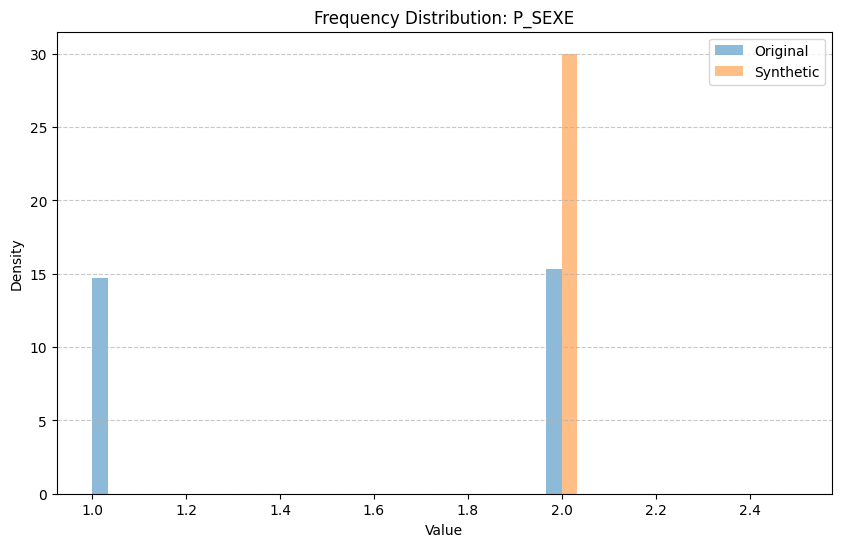

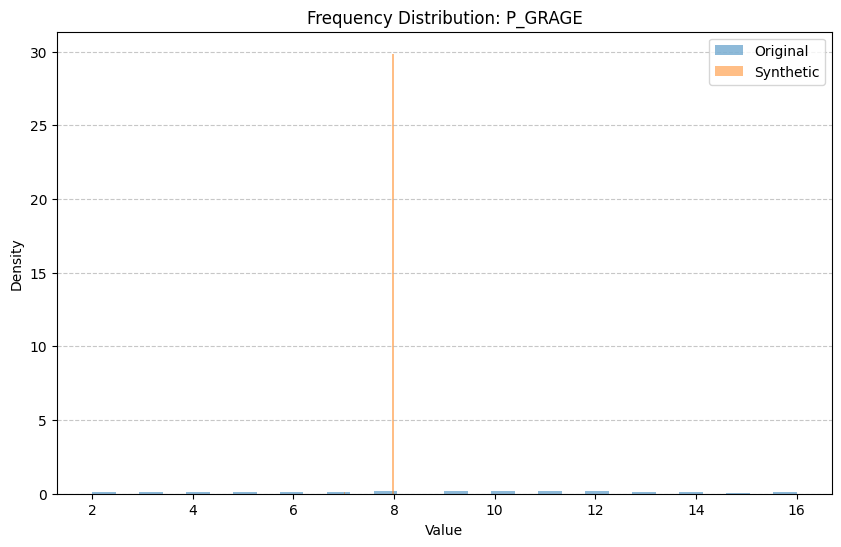

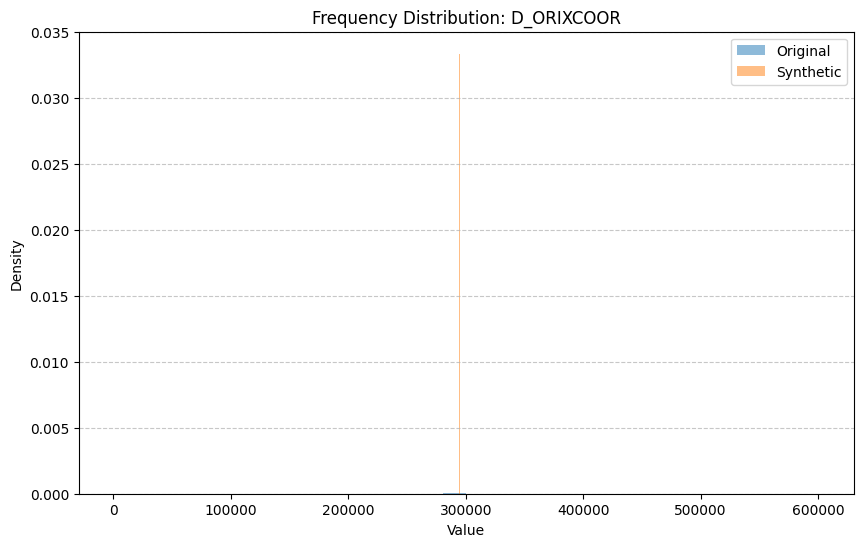

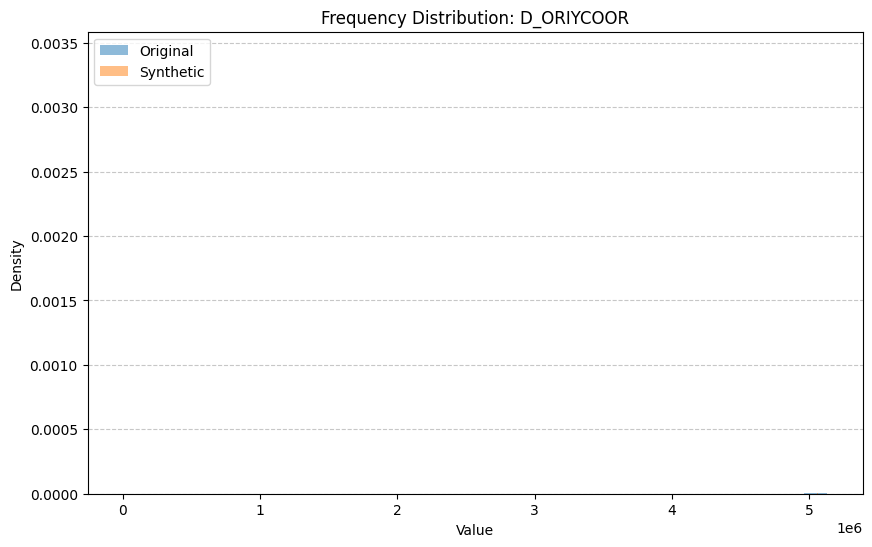

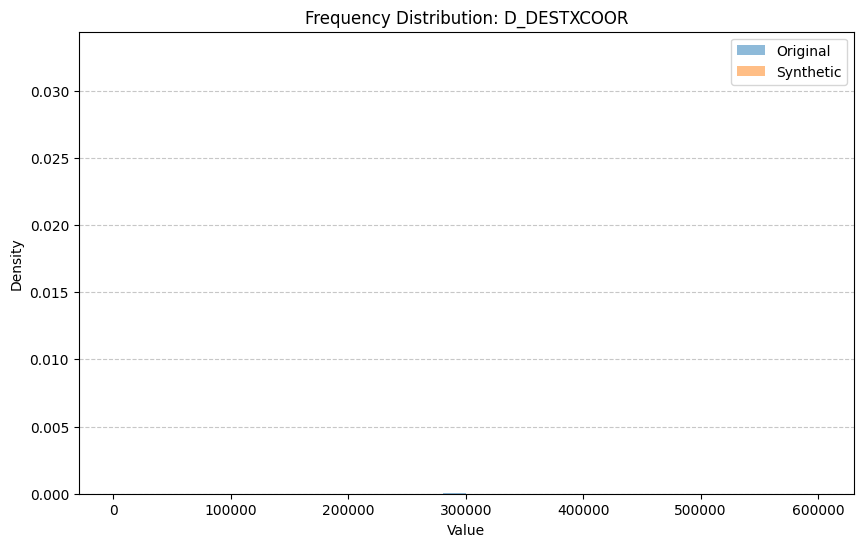

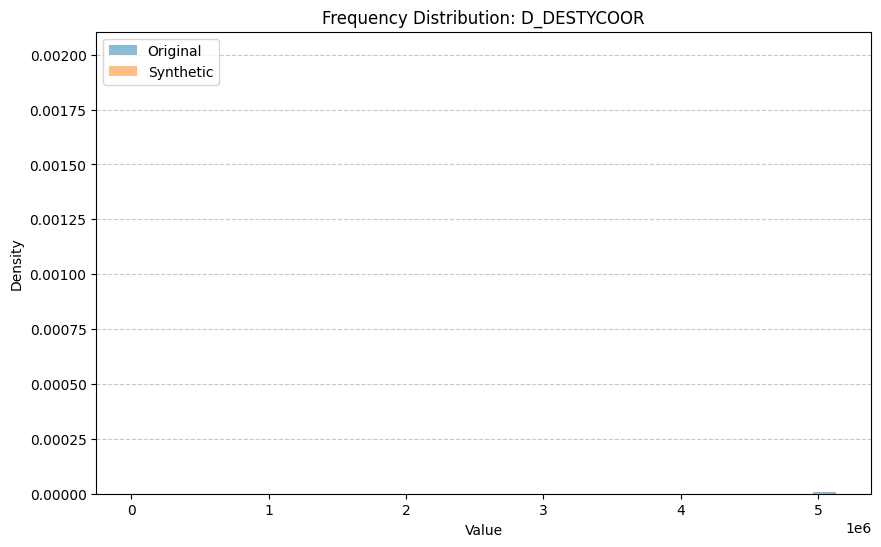

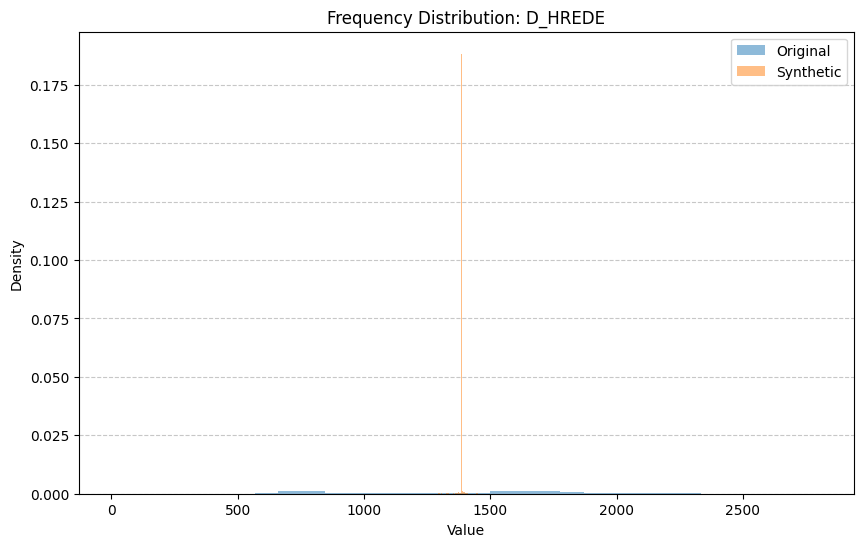

Original P_SEXE distribution:
P_SEXE
2    0.510637
1    0.489363
Name: proportion, dtype: float64
Synthetic P_SEXE distribution:
P_SEXE
2    1.0
Name: proportion, dtype: float64


In [6]:
# Cell 6: Visualize and Compare Frequency Distributions
def plot_frequency_comparison(original, synthetic, column_name):
    """
    Plot histograms to compare frequency distributions of original and synthetic data.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(original, bins=30, alpha=0.5, label='Original', density=True)
    plt.hist(synthetic, bins=30, alpha=0.5, label='Synthetic', density=True)
    plt.title(f'Frequency Distribution: {column_name}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Compare each numeric column
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        plot_frequency_comparison(data[column], synthetic_data[column], column)

# Print unique values for categorical columns
if 'P_SEXE' in synthetic_data.columns:
    print(f"Original P_SEXE distribution:\n{data['P_SEXE'].value_counts(normalize=True)}")
    print(f"Synthetic P_SEXE distribution:\n{synthetic_data['P_SEXE'].value_counts(normalize=True)}")
